In [11]:
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

In [12]:
seq_len = 6

gold_df = pd.read_csv('input\Gold Price.csv')
gold_scaler = MinMaxScaler(feature_range=(-1, 1))
x = gold_scaler.fit_transform(gold_df['USD'].values.reshape(-1, 1))
result_pred = []
for i in tqdm(range(seq_len, len(gold_df))):
    model = ARIMA(x[:i], order=(4,1,4))
    try:
        result = model.fit()
        result_pred.append(result.forecast(step=1)[0])
    except:
        result_pred.append(np.nan)

pred_price = np.array([np.nan] * seq_len + result_pred)
is_nan = np.isnan(pred_price)
mean_squared_error(gold_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)), gold_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)), squared=True)

100%|██████████| 512/512 [02:40<00:00,  3.19it/s]


143.66492014383869

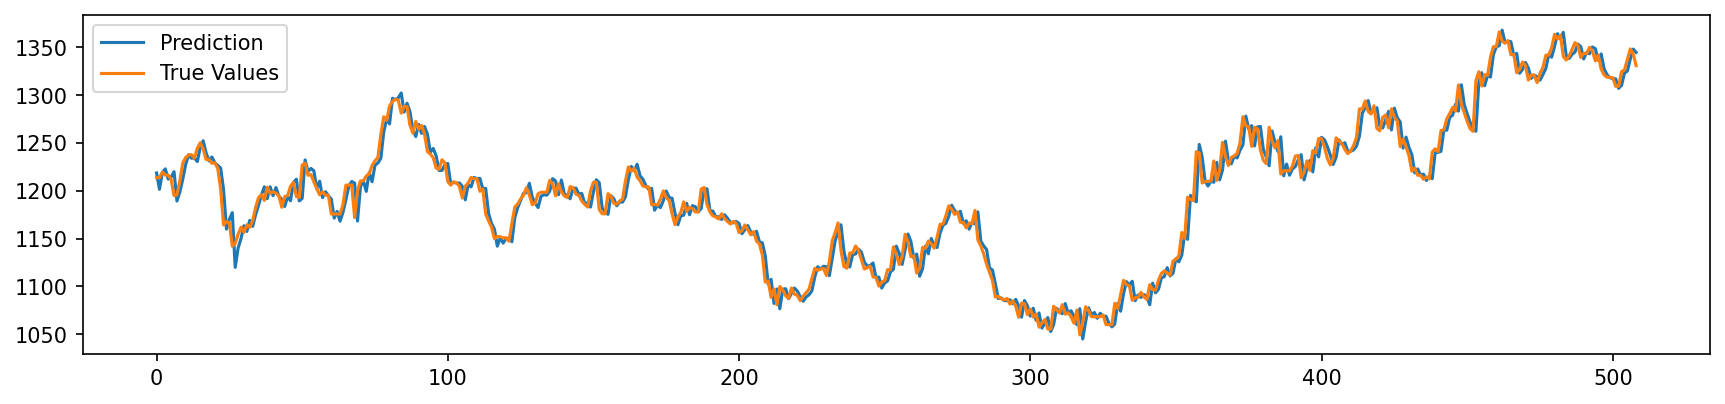

In [13]:
plt.figure(figsize=(14, 3), dpi=150)
plt.plot(gold_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)).flatten(), label = 'Prediction')
plt.plot(gold_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)).flatten(), label = 'True Values')
plt.legend()
plt.show()

In [14]:
gold_df['pred'] = gold_scaler.inverse_transform(pred_price.reshape(-1, 1)).flatten()
gold_df.to_csv('input/ARIMA_pred_gold.csv')

In [15]:
seq_len = 6

bit_df = pd.read_csv('input\Bitcoin Price.csv')
bit_scaler = MinMaxScaler(feature_range=(-1, 1))
x = bit_scaler.fit_transform(bit_df['High'].values.reshape(-1, 1))
result_pred = []
for i in tqdm(range(seq_len, len(bit_df))):
    model = ARIMA(x[:i], order=(4,1,4))
    try:
        result = model.fit()
        result_pred.append(result.forecast(step=1)[0])
    except:
        result_pred.append(np.nan)

pred_price = np.array([np.nan] * seq_len + result_pred)
is_nan = np.isnan(pred_price)
mean_squared_error(bit_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)), bit_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)), squared=True)

100%|██████████| 718/718 [04:19<00:00,  2.77it/s]


160.2118101014621

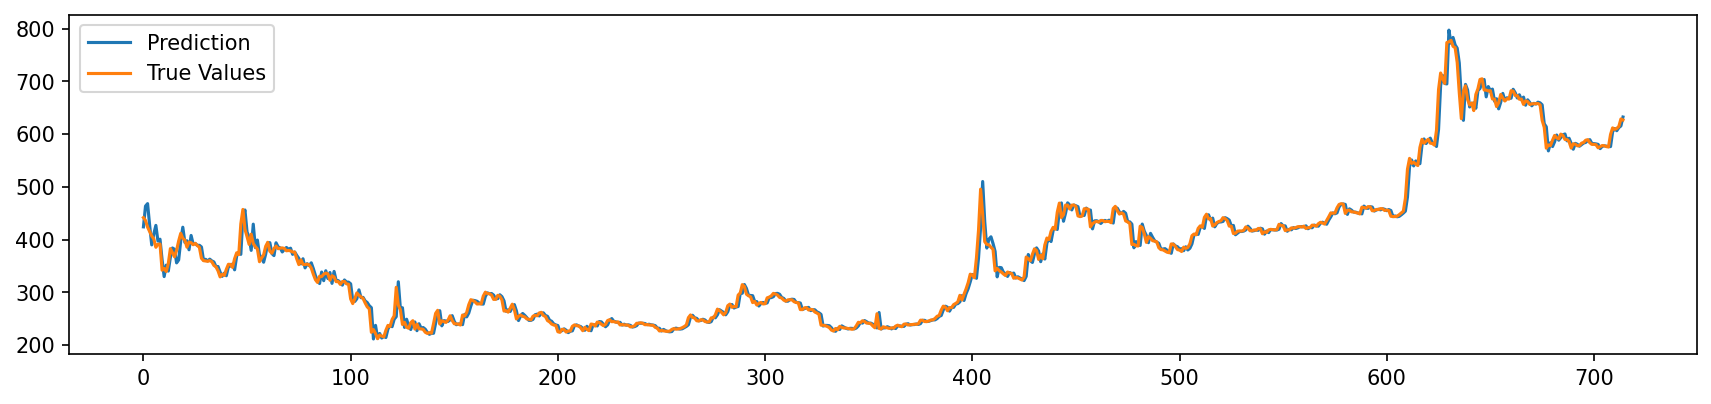

In [16]:
plt.figure(figsize=(14, 3), dpi=150)
plt.plot(bit_scaler.inverse_transform(pred_price[~is_nan].reshape(-1, 1)).flatten(), label = 'Prediction')
plt.plot(bit_scaler.inverse_transform(x[~is_nan].reshape(-1, 1)).flatten(), label = 'True Values')
plt.legend()
plt.show()

In [17]:
bit_df['pred'] = bit_scaler.inverse_transform(pred_price.reshape(-1, 1)).flatten()
bit_df.to_csv('input/ARIMA_pred_bit.csv')